In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [8]:
import math
n = 10000 
ads = 10
ads_select = []
number_selections = [0]*ads
sum_rewards = [0]*ads
total_rewards=0
for i in range(0,n):
    ad = 0
    max_upper_bound = 0
    for j in range(0,ads):
        if (number_selections[j] > 0):
            average_reward = sum_rewards[j] / number_selections[j]
            delta_j = math.sqrt(3/2 * math.log(i + 1) / number_selections[j])
            upper_bound = average_reward + delta_j
        else:
            upper_bound = 1e400
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad=j
    ads_select.append(ad)
    number_selections[ad] = number_selections[ad] + 1
    reward = dataset.values[i, ad]
    sum_rewards[ad] = sum_rewards[ad] + reward
    total_rewards = total_rewards + reward 

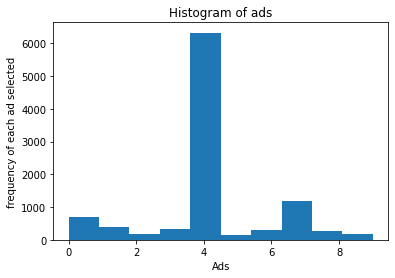

In [9]:
plt.hist(ads_select)
plt.title('Histogram of ads')
plt.xlabel('Ads')
plt.ylabel('frequency of each ad selected')
plt.show()

In [10]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

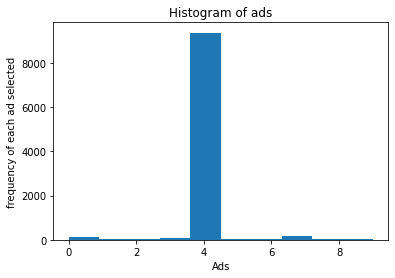

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads')
plt.xlabel('Ads')
plt.ylabel('frequency of each ad selected')
plt.show()